# Training Model on IMDB Sample 

#### Import Libraries

In [1]:
import fastai
from fastai.vision import *

import pandas as pd
from torchvision import models
from visualization.modules import LayeredModule, get_nested_layers
from visualization.data import *
from visualization.image_proc import *
from visualization.interpret import NetLens

#### Define Paths

In [2]:
DATASET_PATH = Path('/home/jupyter/imdb-face-data/imdb_crop/imdb-sample/imdb-sample-data')
META_PATH = Path('/home/jupyter/imdb-face-data/imdb_crop/imdb-sample/imdb-sample-metafull.csv')
MODEL_PATH = Path('/home/jupyter/imdb-face-data/imdb_crop/imdb-sample/model')

#### Verify Images

In [3]:
verify_images(DATASET_PATH)

#### Read Metadata file in a Dataframe

In [4]:
meta = pd.read_csv(META_PATH)

#### Restructure the Dataframe

In [5]:
meta = meta[['absolute_path',
             'parent_path',
             'img_path',
             'name',
             'dob',
             'gender',
             'photo_taken',
             'age',
             'size_W_H',
             'mode']]
meta.head()

absolute_path  \
0  /home/jupyter/imdb-face-data/imdb_crop/40/nm22...   
1  /home/jupyter/imdb-face-data/imdb_crop/54/nm05...   
2  /home/jupyter/imdb-face-data/imdb_crop/47/nm00...   
3  /home/jupyter/imdb-face-data/imdb_crop/96/nm23...   
4  /home/jupyter/imdb-face-data/imdb_crop/96/nm11...   

                                    parent_path  \
0  40/nm2279940_rm2559819520_1984-7-27_2011.jpg   
1   54/nm0575754_rm2285080064_1950-3-4_1983.jpg   
2   47/nm0001347_rm2334775552_1948-2-5_2013.jpg   
3  96/nm2371196_rm1343148800_1982-2-24_2013.jpg   
4  96/nm1130496_rm3249586944_1970-7-21_2013.jpg   

                                    img_path              name   dob  gender  \
0  nm2279940_rm2559819520_1984-7-27_2011.jpg  Taylor Schilling  1984     0.0   
1   nm0575754_rm2285080064_1950-3-4_1983.jpg     Ofelia Medina  1950     0.0   
2   nm0001347_rm2334775552_1948-2-5_2013.jpg   Barbara Hershey  1948     0.0   
3  nm2371196_rm1343148800_1982-2-24_2013.jpg         Fala Chen  1982     0.0   
4  nm1130496_rm3249586944_1970-7-21_2013.jpg     Alysia Reiner  1970     0.0   

   photo_taken  age    size_W_H mode  
0         2011   27  (500, 500)  RGB  
1         1983   33  (500, 500)  RGB  
2         2013   65  (500, 500)  RGB  
3         2013   31  (500, 500)  RGB  
4         2013   43  (500, 500)  RGB

In [6]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19236 entries, 0 to 19235
Data columns (total 10 columns):
absolute_path    19236 non-null object
parent_path      19236 non-null object
img_path         19236 non-null object
name             19236 non-null object
dob              19236 non-null int64
gender           19236 non-null float64
photo_taken      19236 non-null int64
age              19236 non-null int64
size_W_H         19236 non-null object
mode             19236 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 1.5+ MB


#### Plot some images

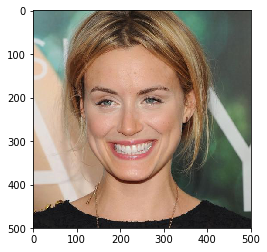

In [7]:
imagee= plt.imread(meta['absolute_path'][0])
plt.imshow(imagee)

In [8]:
def plot_images(df, img_path_col, n_images):
    sample = (i for i in df[img_path_col][:n_images])
    cols = 5
    rows = n_images//cols
    fig, ax = plt.subplots(rows, cols, frameon=False, figsize=(20, 14))

    for i in range(rows):
        for j in range(cols):
            rand_img = next(sample)
            img = plt.imread(rand_img)
            ax[i][j].imshow(img)
            ax[i][j].text(0, -30, img.shape, size=12, rotation=0,
                    ha="left", va="top", 
                    bbox=dict(boxstyle="round", ec='black', fc='white'))
    plt.setp(ax, xticks=[], yticks=[]);

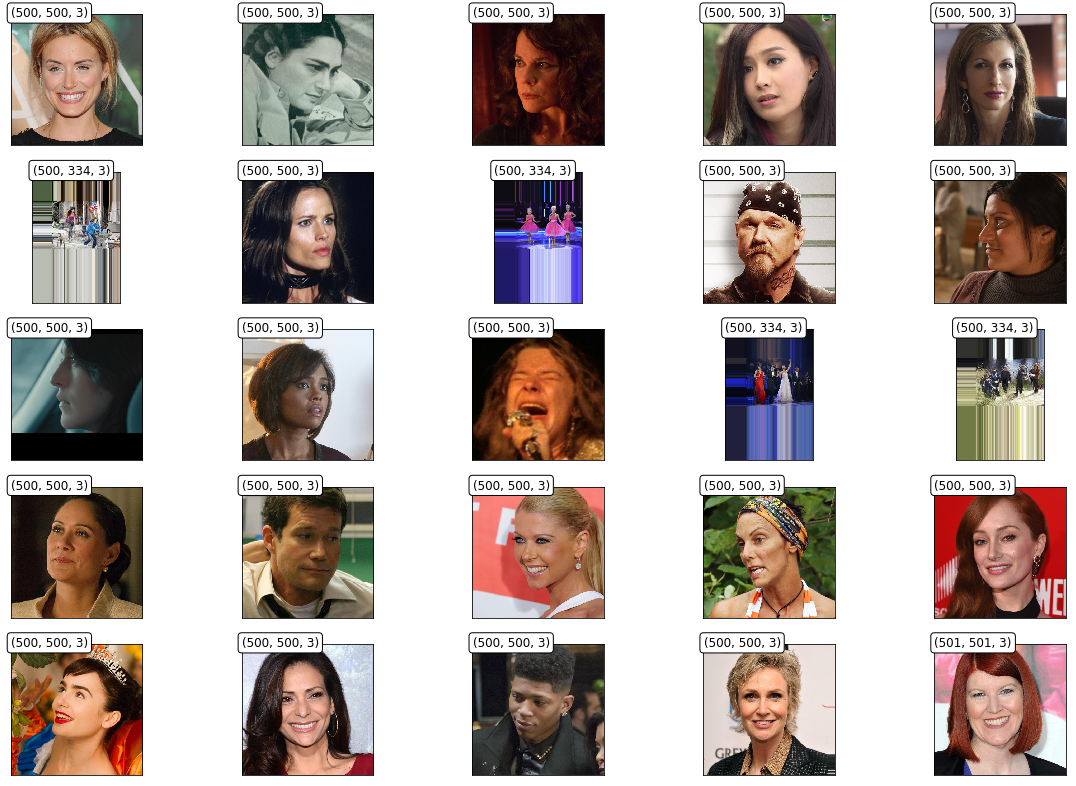

In [9]:
plot_images(meta,'absolute_path', 25)

In [10]:
meta['size_W_H'].value_counts()

(500, 500)    13972
(334, 500)     2243
(333, 500)     2051
(501, 501)      970
Name: size_W_H, dtype: int64

In [11]:
df_334_500 = meta[meta['size_W_H'] == '(334, 500)']
df_333_500 = meta[meta['size_W_H'] == '(333, 500)']
df_500_500 = meta[meta['size_W_H'] == '(500, 500)']
df_501_501 = meta[meta['size_W_H'] == '(501, 501)']

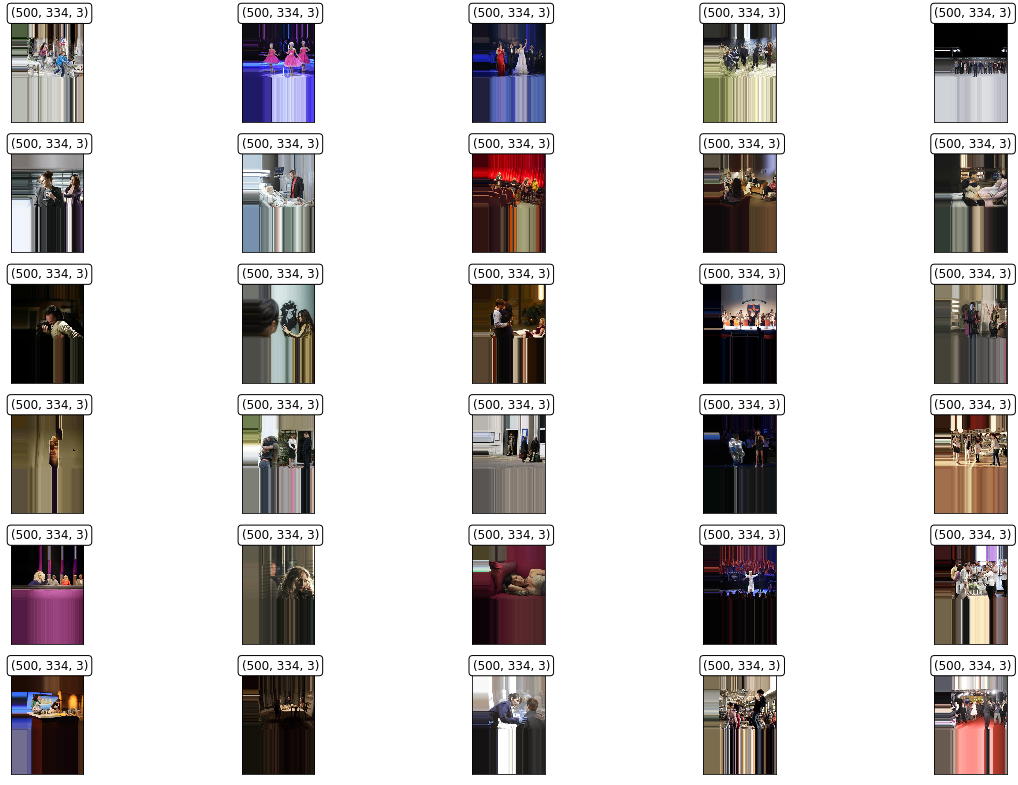

In [12]:
plot_images(df_334_500,'absolute_path', 30)

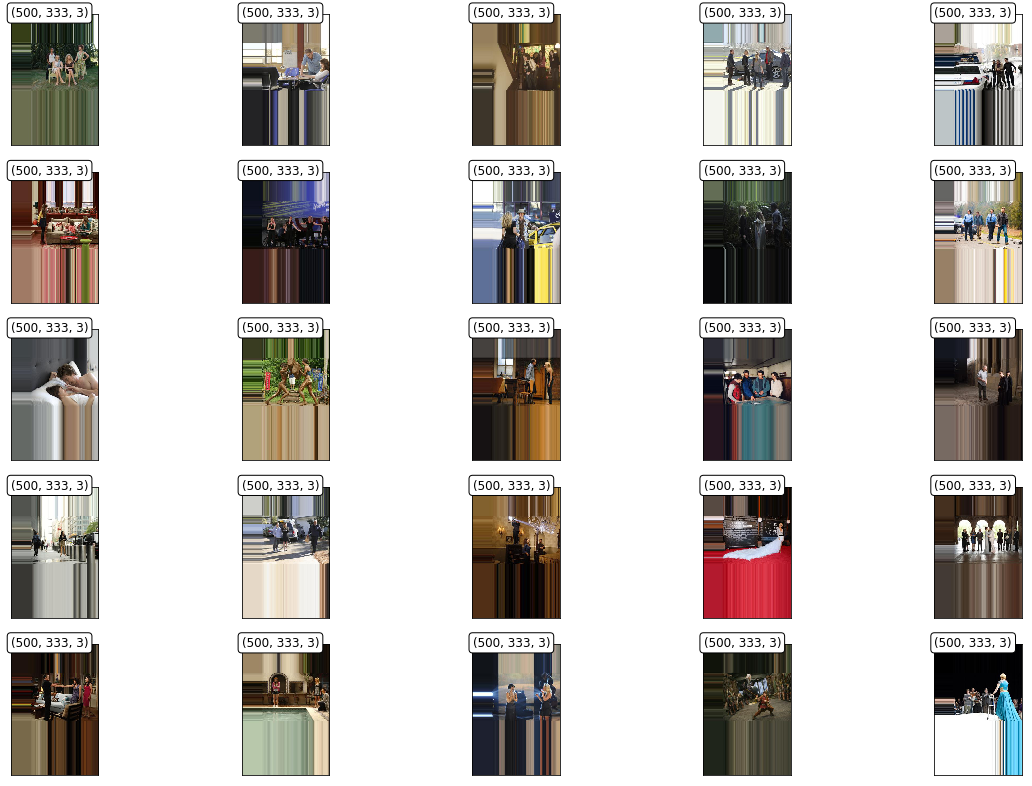

In [13]:
plot_images(df_333_500,'absolute_path', 25)

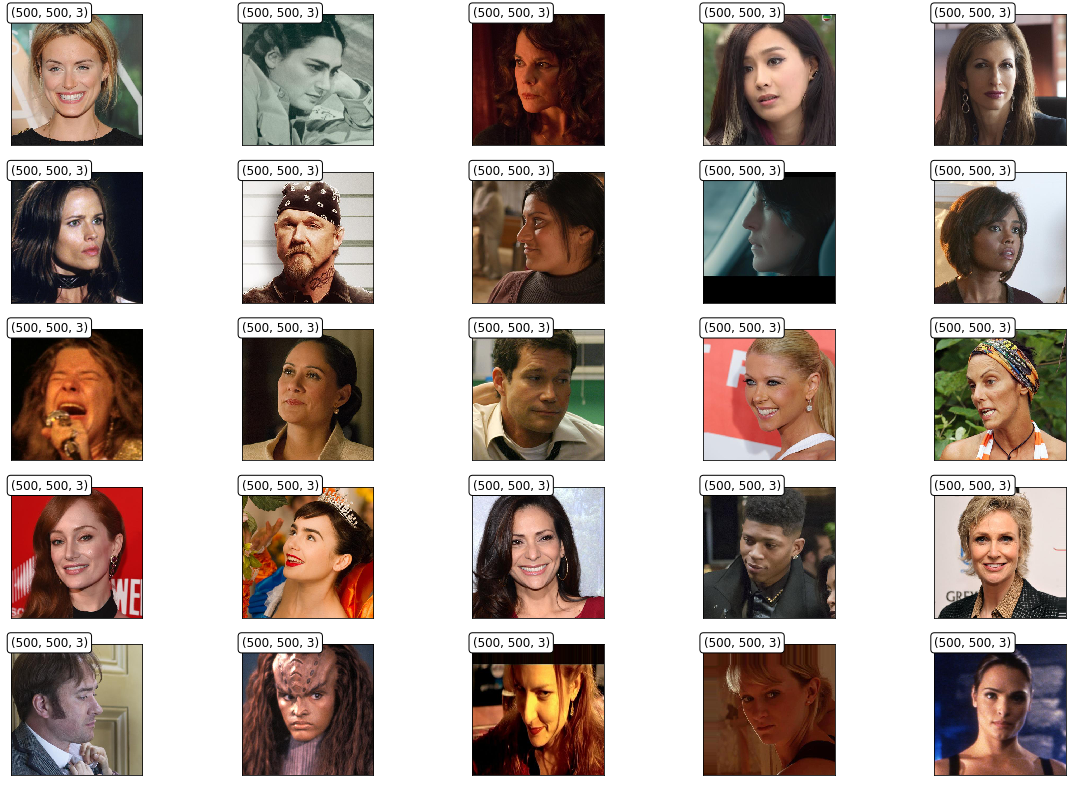

In [14]:
plot_images(df_500_500,'absolute_path', 25)

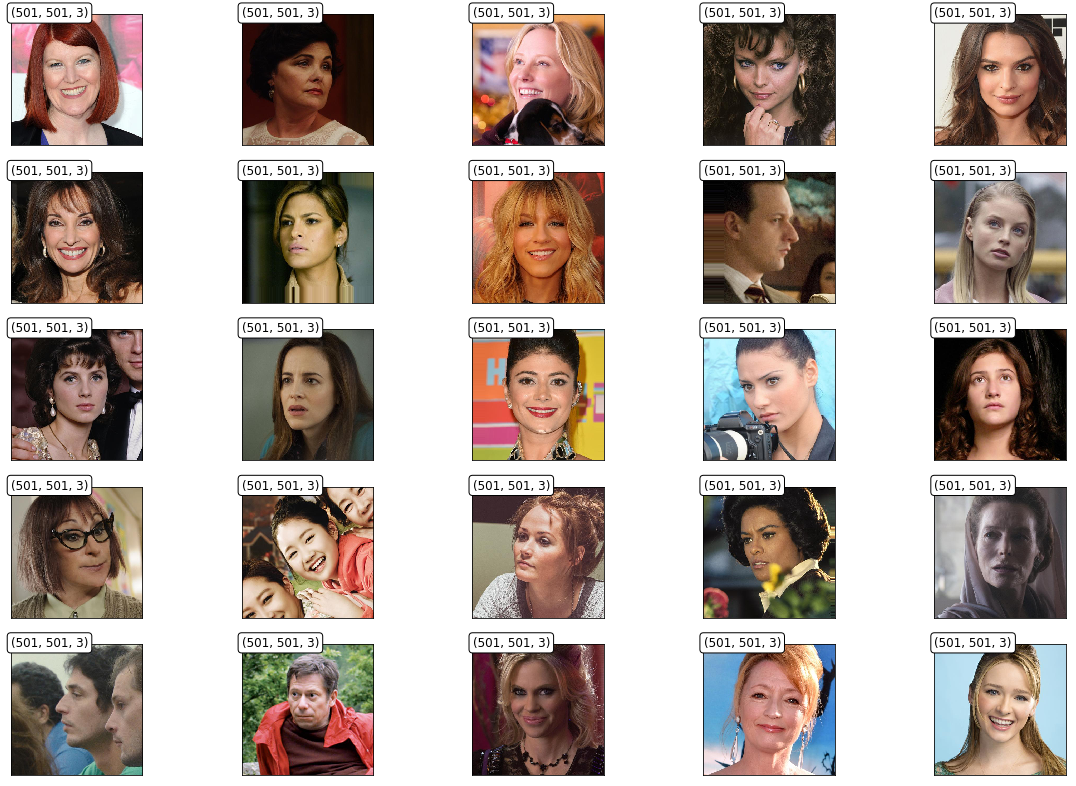

In [15]:
plot_images(df_501_501,'absolute_path', 25)

# FUCK ! IT Seems that our NON-SQuared images are useless. Let's get rid off them...

In [16]:
new_meta = meta[(meta['size_W_H'] == '(500, 500)') |
               (meta['size_W_H'] == '(501, 501)')]

In [17]:
new_meta['size_W_H'].value_counts()

(500, 500)    13972
(501, 501)      970
Name: size_W_H, dtype: int64

In [18]:
len(new_meta)

14942

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f598f5c33c8>]], dtype=object)

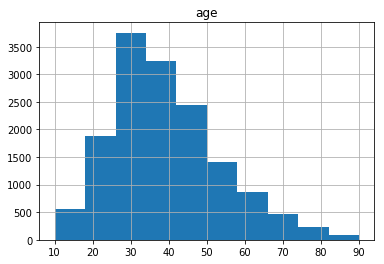

In [19]:
new_meta.hist(['age'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f598f66a898>]], dtype=object)

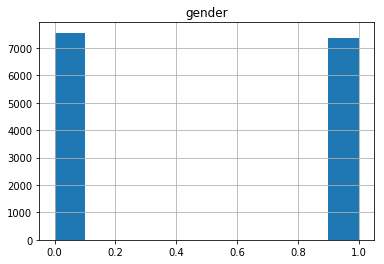

In [20]:
new_meta.hist(['gender'])

In [21]:
new_meta['name'].nunique()

8585

In [22]:
new_meta.head(3)

absolute_path  \
0  /home/jupyter/imdb-face-data/imdb_crop/40/nm22...   
1  /home/jupyter/imdb-face-data/imdb_crop/54/nm05...   
2  /home/jupyter/imdb-face-data/imdb_crop/47/nm00...   

                                    parent_path  \
0  40/nm2279940_rm2559819520_1984-7-27_2011.jpg   
1   54/nm0575754_rm2285080064_1950-3-4_1983.jpg   
2   47/nm0001347_rm2334775552_1948-2-5_2013.jpg   

                                    img_path              name   dob  gender  \
0  nm2279940_rm2559819520_1984-7-27_2011.jpg  Taylor Schilling  1984     0.0   
1   nm0575754_rm2285080064_1950-3-4_1983.jpg     Ofelia Medina  1950     0.0   
2   nm0001347_rm2334775552_1948-2-5_2013.jpg   Barbara Hershey  1948     0.0   

   photo_taken  age    size_W_H mode  
0         2011   27  (500, 500)  RGB  
1         1983   33  (500, 500)  RGB  
2         2013   65  (500, 500)  RGB

## OK, Our new Sample is made of 14942 images, our distribution of age is a bit skewed to the right but is ok, and our Male/Female parity has been kept.

#### Prepare Dataframe for Fatsai Dataloader

In [23]:
age_meta = new_meta.drop(columns=['parent_path', 
                                  'absolute_path', 
                                  'name', 
                                  'dob',
                                  'gender',
                                  'photo_taken',
                                  'size_W_H',
                                  'mode'], axis=1)

In [24]:
age_meta.rename(columns={'age': 'label'}, inplace=True)

In [25]:
age_meta['label'] = age_meta['label'].astype(np.float64)

In [26]:
age_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14942 entries, 0 to 19235
Data columns (total 2 columns):
img_path    14942 non-null object
label       14942 non-null float64
dtypes: float64(1), object(1)
memory usage: 350.2+ KB


In [27]:
age_meta.head(3)

img_path  label
0  nm2279940_rm2559819520_1984-7-27_2011.jpg   27.0
1   nm0575754_rm2285080064_1950-3-4_1983.jpg   33.0
2   nm0001347_rm2334775552_1948-2-5_2013.jpg   65.0

# Model Training

## Instantiate Dataset

In [29]:
bs = 16
tfms = get_transforms(do_flip=False)

In [30]:
data =( ImageList.from_df(age_meta, path=DATASET_PATH,cols='img_path') \
       .random_split_by_pct(0.2) \
       .label_from_df(cols="label", label_cls=FloatList) \
       .transform(tfms, size=448) \
       .databunch(bs=bs) )
data.normalize(imagenet_stats)

/opt/anaconda3/lib/python3.7/site-packages/fastai/data_block.py:212: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


ImageDataBunch;

Train: LabelList (11954 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: FloatList
27.0,33.0,65.0,31.0,43.0
Path: /home/jupyter/imdb-face-data/imdb_crop/imdb-sample/imdb-sample-data;

Valid: LabelList (2988 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: FloatList
22.0,32.0,49.0,22.0,46.0
Path: /home/jupyter/imdb-face-data/imdb_crop/imdb-sample/imdb-sample-data;

Test: None

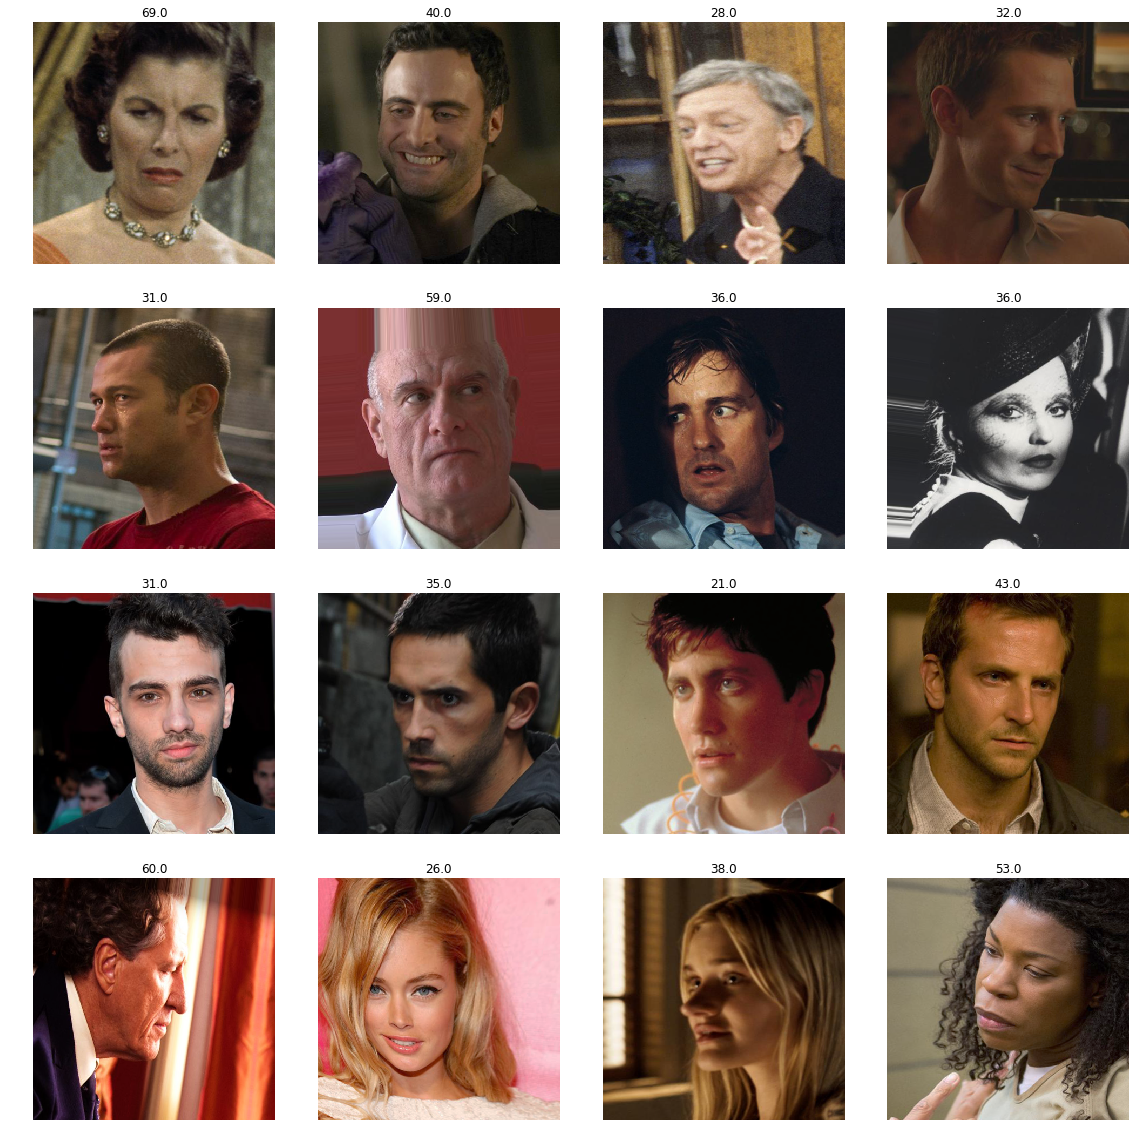

In [31]:
data.show_batch()

## Train Model

In [34]:
learner = cnn_learner(data, models.resnet34, metrics=root_mean_squared_error)
learner.loss = MSELossFlat

In [35]:
learner.fit_one_cycle(5)

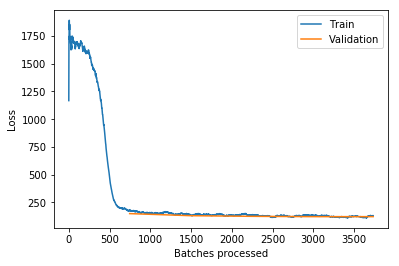

In [36]:
learner.recorder.plot_losses()

In [37]:
learner.summary();

In [38]:
learner.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-06
Min loss divided by 10: 1.91E-07


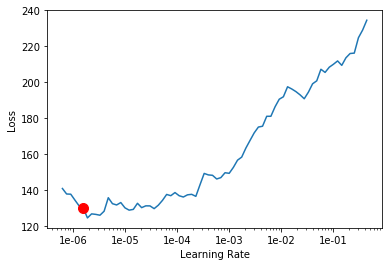

In [39]:
learner.lr_find()
learner.recorder.plot(suggestion=True)

In [40]:
learner.save('imdb-stage-1-fr')

In [41]:
#learner.load('imdb-stage-1-fr')

Learner(data=ImageDataBunch;

Train: LabelList (11954 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: FloatList
27.0,33.0,65.0,31.0,43.0
Path: /home/jupyter/imdb-face-data/imdb_crop/imdb-sample/imdb-sample-data;

Valid: LabelList (2988 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: FloatList
22.0,32.0,49.0,22.0,46.0
Path: /home/jupyter/imdb-face-data/imdb_crop/imdb-sample/imdb-sample-data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1

In [43]:
from fastai.callbacks import *

In [44]:
save_cb = SaveModelCallback(learner, every='improvement', monitor='root_mean_squared_error', mode='min', name='imdb-stage-2-unfr-auto')

In [46]:
learner.fit_one_cycle(8, slice(1e-6, 1e-5), callbacks=[save_cb])

Better model found at epoch 0 with root_mean_squared_error value: 10.676018714904785.
Better model found at epoch 1 with root_mean_squared_error value: 10.660225868225098.
Better model found at epoch 2 with root_mean_squared_error value: 10.525582313537598.
Better model found at epoch 3 with root_mean_squared_error value: 10.413796424865723.
Better model found at epoch 5 with root_mean_squared_error value: 10.409613609313965.
Better model found at epoch 6 with root_mean_squared_error value: 10.365978240966797.


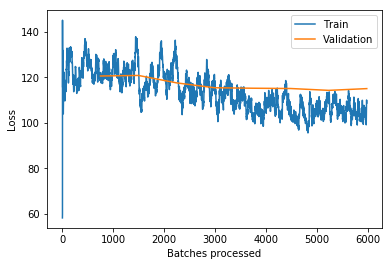

In [47]:
learner.recorder.plot_losses()

In [48]:
preds,y,losses = learner.get_preds(with_loss=True)
interp = Interpretation(learner, preds, y, losses)

In [49]:
interp.top_losses()

torch.return_types.topk(
values=tensor([2.6718e+03, 2.6558e+03, 2.3893e+03,  ..., 5.9056e-04, 4.1956e-05,
        2.2195e-05]),
indices=tensor([ 583, 1238,  785,  ..., 1934, 2919, 2476]))

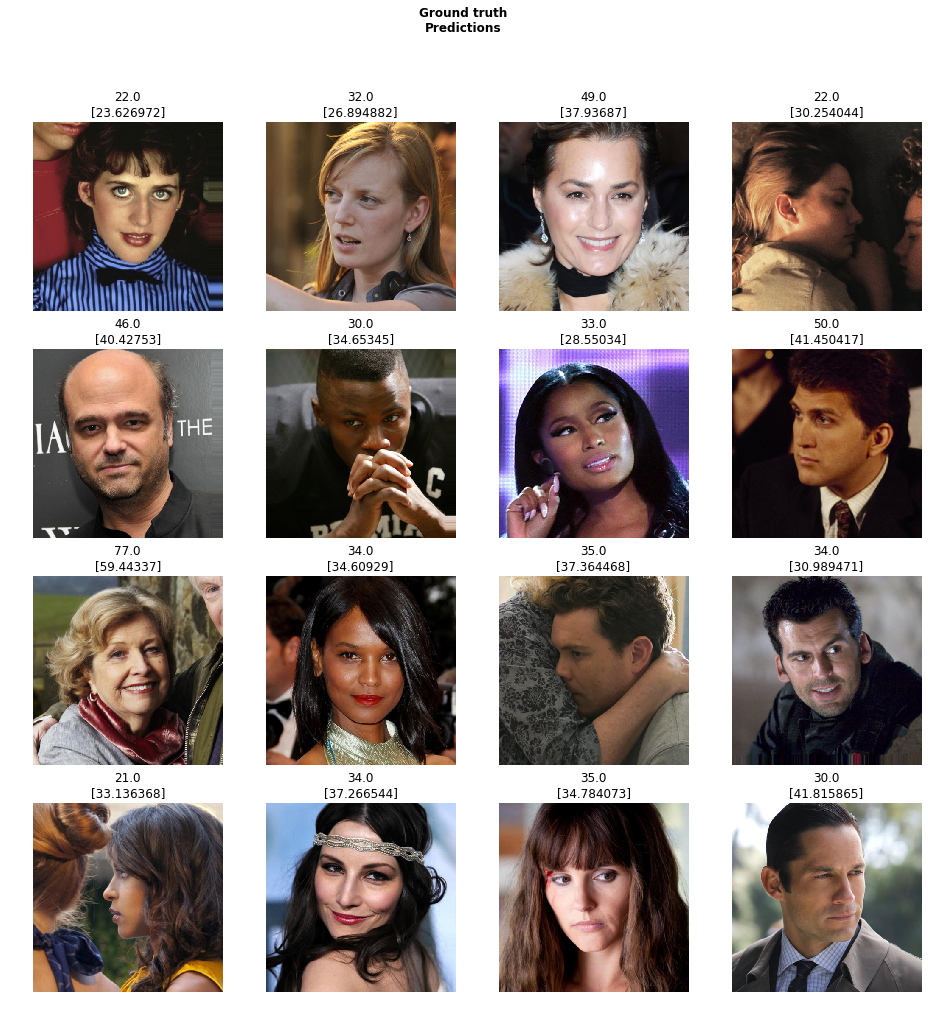

In [52]:
learner.show_results()

#### Export Model

In [60]:
learner.path = Path('/home/jupyter/imdb-model')

In [64]:
learner.export('imdb-sample-resnet34-unfr.pkl')